# Portfolio 2: Analysing COVID-19 Data

For the second portfolio we'll look at the most relevant dataset to our lives at the moment: the global spread of COVID-19.   There is an open dataset available that is updated often showing the number of cases in different regions of the world.  This is the source of the graphs and visualisations that you'll see on the news. 

Here are some sample stories for reference:

* [From the ABC](https://www.abc.net.au/news/2020-03-26/coronavirus-covid19-global-spread-data-explained/12089028)
* [From the Guardian](https://www.theguardian.com/australia-news/datablog/ng-interactive/2020/apr/06/coronavirus-cases-in-australia-map-curve-confirmed-numbers-stats-how-many-covid-19-nsw-by-postcode-maps-victoria-live-data-qld-sa-wa-tas-nt-act-latest-statistics)
* [Coronavirus in Australia](https://www.covid19data.com.au/)
* [ArcGIS Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) Johns Hopkins


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the Data

The first step is to get a copy of the raw data.  The data is being made available by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). In this project, we are interested in the global confirmed cases dataset.  

Instead of copying the data into this project, we will just read it from the URL. The advantage of reading the URL is that we'll get live updates, although it also can be a disadvantage as we will be required to repeat the process if the data changes.

In [2]:
# load the live dataset, assumes a working network connection
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

In [3]:
covid.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,3860,4044,4283,4472,4823,5041,5271,5606,5928,6302
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3071,3074,3075,3076,3078,3081,3082,3084,3086,3087


In [4]:
covid.shape

(266, 127)

## Explore the Data

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states (Please refer to the covid.head data table as displayed above).

For the analysis we want to look at data for countries only, so the first operation on the data frame is to combine all of the rows for countries like Australia that are split into states.  We then want to drop the non-numeric columns to leave us with just the numbers on each day for each country.  This can be done using the [`groupby`](https://pandas.pydata.org/docs/getting_started/10min.html#grouping) method and the [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method.  We can use these to make a new dataframe containing just the numerical data.

In [5]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])

In [6]:
grouped.isnull().values.any()

False

In [7]:
grouped.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998
Albania,0,0,0,0,0,0,0,0,0,0,...,898,916,933,946,948,949,964,969,981,989
Algeria,0,0,0,0,0,0,0,0,0,0,...,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113
Andorra,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,761,761,762,762,762,762
Angola,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,50,52,52,58,60,61
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
Argentina,0,0,0,0,0,0,0,0,0,0,...,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353
Armenia,0,0,0,0,0,0,0,0,0,0,...,3860,4044,4283,4472,4823,5041,5271,5606,5928,6302
Australia,0,0,0,0,4,5,5,6,9,9,...,7019,7035,7044,7054,7068,7072,7081,7095,7099,7114


In [8]:
grouped.shape

(188, 123)

Now, we have a dataset that contains information for countries only and the number of rows and columns have been reduced as expected.

### Area of interest
We can now select an area of interest to see the COVID-19 trend of one specific country by [using the `loc` method](https://pandas.pydata.org/docs/getting_started/10min.html#selection) since the new dataframe will have the grouped values (Countries) as the row labels. Here, the country that we would like to observe is Australia.  We should see the exponential rise in case numbers over time.

In [9]:
grouped.loc["Australia", :]
AustraliaCovid19=grouped.loc["Australia", :]

### Australia COVID-19 trend as per 5/23/2020

To see the trend of how COVID-19 spreads in Australia, we can simply plot a line graph as shown below. 

Text(0, 0.5, 'Number of covid cases')

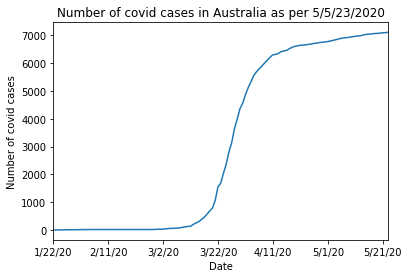

In [10]:
grouped.loc["Australia", :].plot.line()
plt.title('Number of covid cases in Australia as per 5/5/23/2020')
plt.xlabel('Date')
plt.ylabel('Number of covid cases')

In the graph above, we can see that the virus slowly increased in the beginning stage of the spread (01/26/20 to 03/9/20), where the number of cases were still below 100. However, from 03/10/20, where the number of cases has surpassed 100, the trend started to increase significantly before the number of cases began to remain stabil in 04/18/20. 

## Comparing Countries

One of the classic displays in the news is the comparison between countries.  Here, we are interested to observe 10 countries with significant outbreaks such as China, USA, Italy, UK, Australia.

To do that, we first need to group countries of interest as shown below:

In [11]:
grouped_country = grouped.loc[["US", "Spain", "Italy", "France", "Germany", "United Kingdom","Turkey", "Iran", "China","Australia"], :]

In [12]:
grouped_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,1417774,1442824,1467820,1486757,1508308,1528568,1551853,1577147,1600937,1622612
Spain,0,0,0,0,0,0,0,0,0,0,...,229540,230183,230698,230698,231606,232037,232555,233037,234824,235290
Italy,0,0,0,0,0,0,0,0,0,2,...,223096,223885,224760,225435,225886,226699,227364,228006,228658,229327
France,0,0,2,3,3,3,4,5,5,5,...,178994,179630,179630,179693,180051,180933,181700,181951,182015,182036
Germany,0,0,0,0,0,1,4,4,4,5,...,174478,175233,175752,176369,176551,177778,178473,179021,179710,179986
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,234440,238004,241461,244995,247709,250138,249619,252246,255544,258504
Turkey,0,0,0,0,0,0,0,0,0,0,...,144749,146457,148067,149435,150593,151615,152587,153548,154500,155686
Iran,0,0,0,0,0,0,0,0,0,0,...,114533,116635,118392,120198,122492,124603,126949,129341,131652,133521
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,84029,84038,84044,84054,84063,84063,84063,84063,84081,84084


### Australia in comparison to other countries

To compare the number of COVID-19 cases in Australia with other parts of the world, we can use similar method as used previously by  plotting a line graph for Australia and other countries with higher number of COVID-19 cases, as displayed below. 

Text(0, 0.5, 'Number of covid cases')

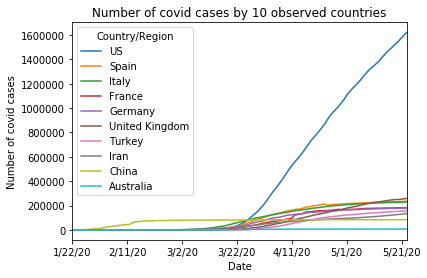

In [13]:
grouped_country.T.plot.line()
plt.title('Number of covid cases by 10 observed countries')
plt.xlabel('Date')
plt.ylabel('Number of covid cases')

In general, the graph shows that the US is currently has the highest number of COVID-19 cases followed by Spain and Italy, with Australia has the lowest covid cases compared to the rest of the countries in observation. However, this does not mean that Australia performs better in coping with the spread of the virus compared with countries with higher number of COVID-19 cases. All the countries illustrated in the graph above have  higher number of total population compared to Australia, and that could be the one of the reasons why the US and other countries have higher COVID-19 cases in Australia.   

## Normalisation by Population

The raw data includes the overall count of cases in each country. Clearly small countries will have smaller overall values than large countries.  It would be interesting to see whether the number of cases in China and the US was more per-capita than those in other countries and find which country has the highest number as a proportion of the population. (A good way to measure this is the number of cases per million people in the population. If a country has 25 cases and a population of 2.5 million they would have 10 cases per million).

To answer these questions we need population data. Here, we will use the population data obtained from [datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) which has data per country up to 2016 in CSV format. We will use this data set to compute the number of confirmed cases for each country per million population and Create a new plot with this data. 

To be able to do that, we need to combine two different datasets: the covid cases (let's call it 'grouped') dataset and the 2016 population data('population'). However, before combining the two datasets, we need to make sure that the names of the countries used in both datasets are similar. In this project, the population data are adjusted to the covid cases data, which means that the name of the countries in the population data are changed into the similar names as displayed in the grouped data.

Then, once we we ensure that the datasets used in the analysis have similar names for countries, we can then join the two datasets as shown below:

In [14]:
population = pd.read_csv('data/population_2016.csv', index_col='Country/Region')

In [15]:
left=grouped
right=population
country_populationX = left.join(right, how='left')

In [16]:
country_populationX.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,total_population
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,34656032.0
Albania,0,0,0,0,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,2876101.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,40606052.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,77281.0
Angola,0,0,0,0,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,28813463.0


As can be seen in the above table, we now have the total population information is integrated into the grouped data for the covid cases.

We then need to divide the total population by 1 million and store the results in column 'total_population_right'as can be seen in the new data frame called 'country_populationY' (please refer to the table generated after the 4 following codes).

In [17]:
population_divX = country_populationX[['total_population']].div(1000000, axis=0)

In [18]:
population_divX.head()

,total_population
Country/Region,
Afghanistan,34.656032
Albania,2.876101
Algeria,40.606052
Andorra,0.077281
Angola,28.813463


In [19]:
country_populationY = country_populationX.merge(population_divX, left_on='Country/Region', right_on='Country/Region', suffixes=('_left', '_right'))

In [20]:
country_populationY.shape

(188, 125)

In [21]:
country_populationY.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,total_population_left,total_population_right
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,6402,6664,7072,7653,8145,8676,9216,9998,34656032.0,34.656032
Albania,0,0,0,0,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,2876101.0,2.876101
Algeria,0,0,0,0,0,0,0,0,0,0,...,6821,7019,7201,7377,7542,7728,7918,8113,40606052.0,40.606052
Andorra,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,77281.0,0.077281
Angola,0,0,0,0,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,28813463.0,28.813463


To get the number of covid cases per country per 1 million population, we need to divide the number of cases in each column with the the number of 'total_population_right'(the value of the total population divided by 1 million). Then, we can generate new graph for covid cases countries comparison to see the number of covid cases per capita as displayed below:

In [22]:
country_cases1m=country_populationY.loc['1/22/20':, '5/22/20'] = country_populationY.loc[:, '1/22/20':'5/23/20'].div(country_populationY['total_population_right'], axis=0)

In [23]:
normal_covidcase = country_cases1m.loc[["US", "Spain", "Italy", "France", "Germany", "United Kingdom","Turkey", "Iran", "China","Australia"], :]

Text(0, 0.5, 'Number of covid cases')

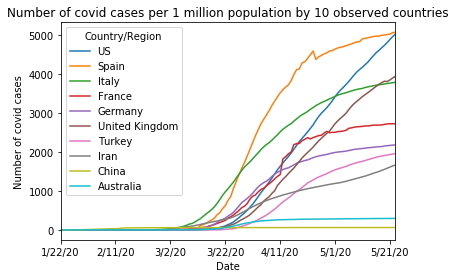

In [24]:
normal_covidcase.T.plot.line()
plt.title('Number of covid cases per 1 million population by 10 observed countries')
plt.xlabel('Date')
plt.ylabel('Number of covid cases')

Based on the new graph as displayed above, we can see that Spain has the highest number of cases per 1 million population higher than the US which has the highest number of cases in general without data normalization. It is also interesting to see that after data is normalized by population, Australia is no longer has the lowest number of covid cases as China has become the country with the lowest number of covid cases among all 10 countries in our observation. This means that China could be better in coping with the spread of the COVID-19 virus compared to all the countries in our observation including Australia. 